In [10]:
import pandas as pd
import numpy as np
import xarray as xr
from pathlib import Path
import os
import matplotlib.pyplot as plt
%matplotlib widget

Giving them anomalies will save some time:. And using LONG dataset is better because it is more realistic and does not weight too strongly soil moisture.

In [3]:
mrso_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_mrso.nc')

*I recommend that we work with Data_Plasim_LONG because the day-night cycle is more realistic and reduces the unusual effectiveness of just mrso*

In [4]:
mrso_full

<xarray.Dataset>
Dimensions:    (time: 1200000, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [5]:
1200000/16

75000.0

In [6]:
mrso500 = mrso_full.isel({'time': slice(0,75000)})
mrso500

<xarray.Dataset>
Dimensions:    (time: 75000, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [13]:
mrso500_north = mrso500.where(mrso500.lat > 0, drop=True)

In [25]:
mrso500_ns = mrso500_north.where(mrso500_north.time.dt.month < 9, drop=True)
mrso500_ns

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 32, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 9.767 6.977 4.186 1.395
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    mrso       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [31]:
mrso500_ns.time[24000]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1, 5, 1, 10, 30, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 0001-05-01 10:30:00
Attributes:
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In [16]:
mrso500.to_netcdf('mrso500.nc')

/home/gmiloshe/miniconda3/envs/myenvnew/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [19]:
mrso500_2 = xr.open_dataset('data/mrso500.nc')

mrso500 == mrso500_2

<xarray.Dataset>
Dimensions:    (time: 75000, lon: 128, lat: 64, bnds: 2)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) bool True True True True ... True True True True
    mrso       (time, lat, lon) bool True True True True ... True True True True

To Alessnadro: Perhaps you can upload the mrso500 as well as t2m500 when you get the chance. Meanwhile I am running some tests on the data...

In [29]:
if not os.path.exists('data'):
    !mkdir data
    !wget -O data/mrso10o.nc "https://drive.google.com/uc?export=download&id=14TB1TJ-EF5v-Z5a3LjVw0DXT2o3m45JL"
else:
    print('data already here')

data already here


In [2]:
link = "https://drive.google.com/uc?export=download&id=14TB1TJ-EF5v-Z5a3LjVw0DXT2o3m45JL"
def fetch(name, destination='./data', reload=False):
    destination = Path(destination).resolve()
    if not os.path.exists(destination):
        destination.mkdir(parents=True)

    file = destination / name
    if not os.path.exists(file) or reload:
        os.system(f"wget -O {file} \"{link}\"")
    else:
        print('file already loaded')

In [5]:
link = "https://mycore.core-cloud.net/index.php/s/r9XRFyOQgmsAvNG/download"

In [6]:
fetch('mrso')

--2022-03-24 12:50:24--  https://mycore.core-cloud.net/index.php/s/r9XRFyOQgmsAvNG/download
Resolving mycore.core-cloud.net (mycore.core-cloud.net)... 194.57.138.247, 194.57.138.240
Connecting to mycore.core-cloud.net (mycore.core-cloud.net)|194.57.138.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413481 (404K) [application/octet-stream]
Saving to: ‘/ClimateDynamics/MediumSpace/ClimateLearningFR/alovo/EW2/data/mrso’

     0K .......... .......... .......... .......... .......... 12% 16.0M 0s
    50K .......... .......... .......... .......... .......... 24% 34.2M 0s
   100K .......... .......... .......... .......... .......... 37% 23.5M 0s
   150K .......... .......... .......... .......... .......... 49% 26.0M 0s
   200K .......... .......... .......... .......... .......... 61% 24.2M 0s
   250K .......... .......... .......... .......... .......... 74% 29.8M 0s
   300K .......... .......... .......... .......... .......... 86% 30.7M 0s
   350K .......

## Doing things nicely

In [48]:
def cut(full_field, nyears=500, last_month=8, min_lat=28):
    # take the first n_years
    f = full_field.isel({'time': slice(0,150*nyears)})
    # remove excessive months
    f = f.where(f.time.dt.month <= last_month, drop=True)
    # remove low latitudes
    f = f.where(f.lat > min_lat, drop=True)

    return f

In [49]:
mrso_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_mrso.nc')
mrso = cut(mrso_full)
mrso

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    mrso       (time, lat, lon) float32 0.0 0.0 0.0 ... -0.00021 2.832e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [50]:
mrso.to_netcdf('data/mrso.nc')

/scratch/alovo/miniconda3/envs/python3.9/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [51]:
t2m_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_tas.nc')
t2m = cut(t2m_full)
t2m

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    tas        (time, lat, lon) float32 0.7941 0.8237 0.8505 ... 0.7547 1.329
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Fri Oct 01 20:31:36 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [52]:
t2m.to_netcdf('data/tas.nc')

/scratch/alovo/miniconda3/envs/python3.9/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [53]:
zg500_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_zg500.nc')
zg500 = cut(zg500_full)
zg500

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lev: 1, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
  * lev        (lev) float64 500.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    zg         (time, lev, lat, lon) float32 141.1 143.4 145.6 ... 4.055 -4.439
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Wed Sep 29 11:33:55 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [54]:
zg500.to_netcdf('data/zg500.nc')

In [2]:
lsm_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc')
lsm_full

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64, lev: 10, time: 720)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lev      (lev) float64 100.0 200.0 300.0 400.0 ... 700.0 800.0 900.0 1e+03
  * time     (time) object 0001-01-01 00:00:00 ... 0001-01-30 23:00:00
Data variables:
    lsm      (time, lat, lon) float32 ...
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [3]:
lsm = lsm_full.isel(dict(time=0, lev=0))
lsm

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
    lev      float64 100.0
    time     object 0001-01-01 00:00:00
Data variables:
    lsm      (lat, lon) float32 ...
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [9]:
lsm = lsm.drop_vars(['time', 'lev'])
lsm

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
Data variables:
    lsm      (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [10]:
lsm.to_netcdf('data/lsmask.nc')

### Fixing the time axis

In [2]:
mrso = xr.open_dataset('data/mrso.nc')
mrso

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [5]:
60000/12000

5.0

In [11]:
@np.vectorize
def traslate(a, y):
    return a.replace(year = a.year + y)

In [12]:
new_time = []
n = 12000
for c in range(5):
    new_time.append(traslate(mrso.time[c*n:(c+1)*n], 100*c))

new_time = np.concatenate(new_time)

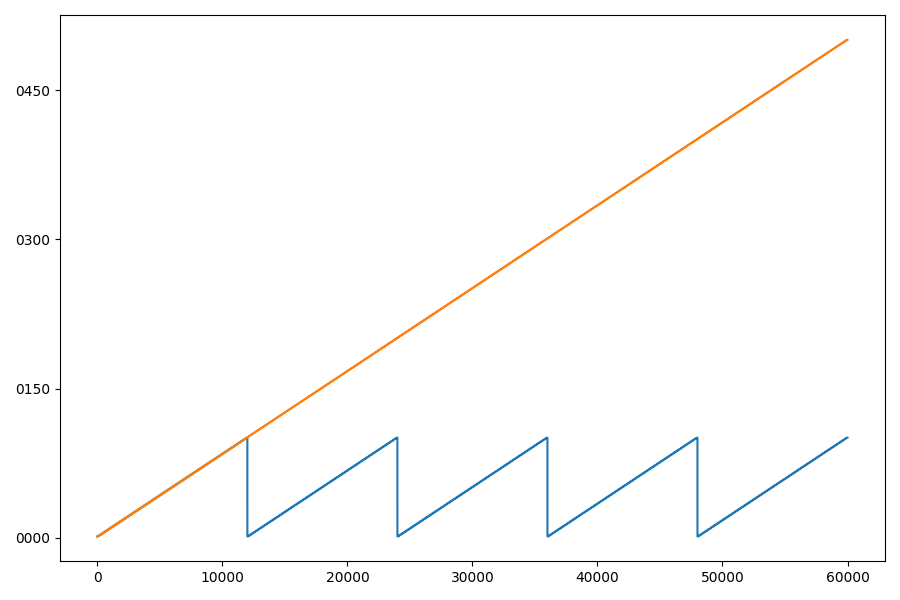

In [13]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(mrso.time)
plt.plot(new_time)

fig.tight_layout()

In [17]:
mrso = mrso.assign_coords({'time': new_time})
mrso.to_netcdf('data/mrso2.nc')

In [18]:
tas = xr.open_dataset('data/tas.nc')
tas = tas.assign_coords({'time': new_time})
tas.to_netcdf('data/tas_.nc')

In [19]:
zg500 = xr.open_dataset('data/zg500.nc')
zg500 = zg500.assign_coords({'time': new_time})
zg500.to_netcdf('data/zg500_.nc')

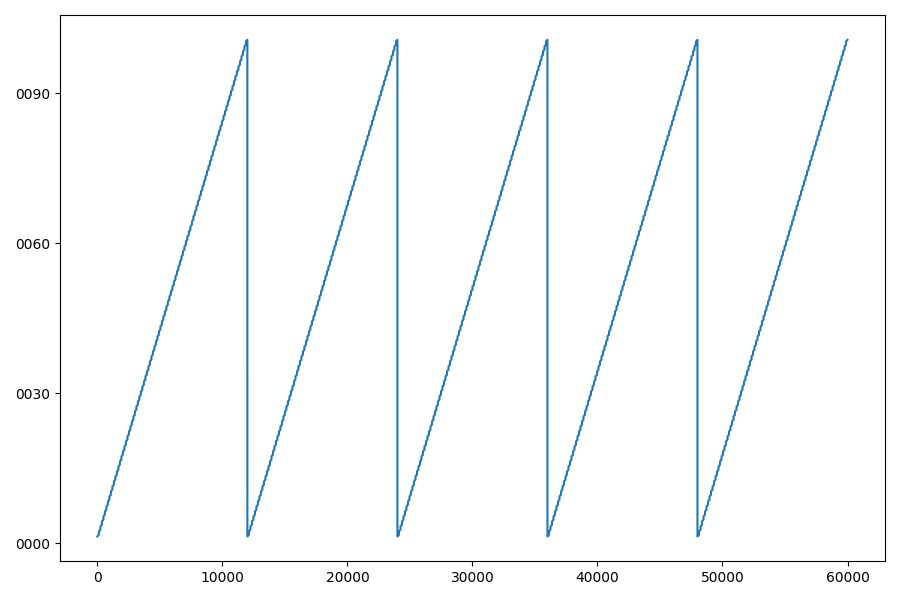

In [21]:
tas = xr.open_dataset('data/tas.nc')

plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(tas.time)

fig.tight_layout()